# K-Means Clustering

-------

### 1. Import the required libraries

In [528]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---------

### 2. Generate dataset

In [529]:
#Number of clusters in the dataset
K = 5

#Number of samples in the dataset
n_samples = 100

In [530]:
# using the make_blobs dataset to generate a dataset of 100 samples with 5 clusters
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=n_samples, centers=K, random_state=101)

In [531]:
#View the shape of X-array
X.shape

(100, 2)

In [532]:
#View value of assigned clusters
y

array([3, 1, 4, 3, 0, 0, 2, 4, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 4, 0, 4, 3,
       4, 0, 0, 3, 1, 3, 4, 0, 1, 2, 4, 1, 1, 4, 3, 3, 1, 0, 2, 4, 0, 0,
       2, 4, 3, 1, 1, 1, 3, 3, 2, 4, 1, 3, 0, 2, 4, 4, 1, 3, 2, 2, 4, 0,
       3, 4, 1, 3, 4, 3, 2, 3, 2, 0, 2, 3, 1, 2, 1, 4, 2, 4, 3, 2, 2, 0,
       1, 2, 4, 0, 3, 2, 1, 4, 3, 2, 2, 0])

### 3. Visualize dataset

Text(0.5, 1.0, 'Original Dataset')

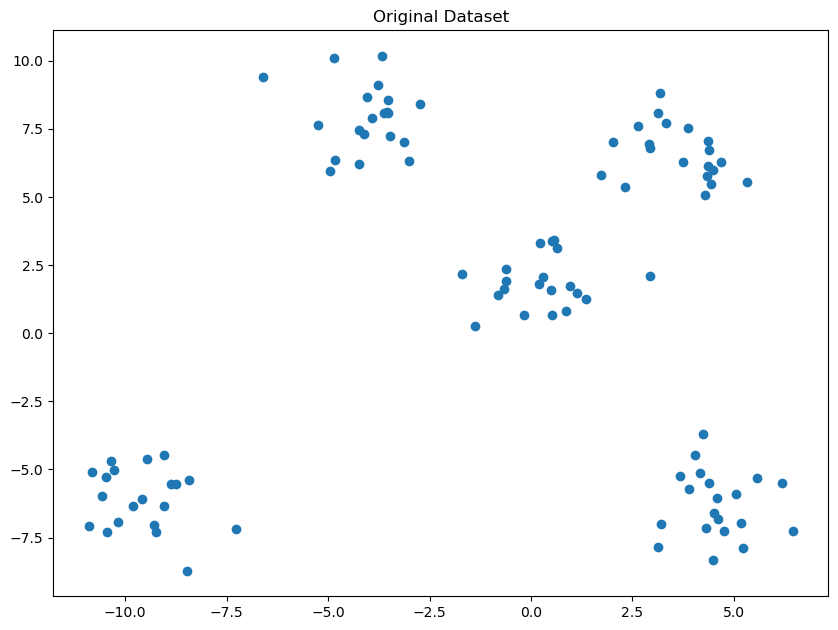

In [533]:
#Visualize the original dataset
plt.scatter(X[:,0],X[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Original Dataset')

-------

### 4. Randomly select initial centroids

In [534]:
#Select 5 points at random from the X dataset
#np.random.choice(n, num_clusters, replace=False) selects 5 points at random from 0 to length of the dataset.
#We input the 5 numbers and get the selected centroids based on index
centroids =  X[np.random.choice(n_samples, K, replace=False), :]

In [535]:
#Randomly selected set of 5 centroids
centroids

array([[  4.15136702,  -5.1385105 ],
       [ -9.59305021,  -6.08375814],
       [-10.56433263,  -5.95908897],
       [ -1.37811338,   0.25423232],
       [  0.96675957,   1.74299804]])

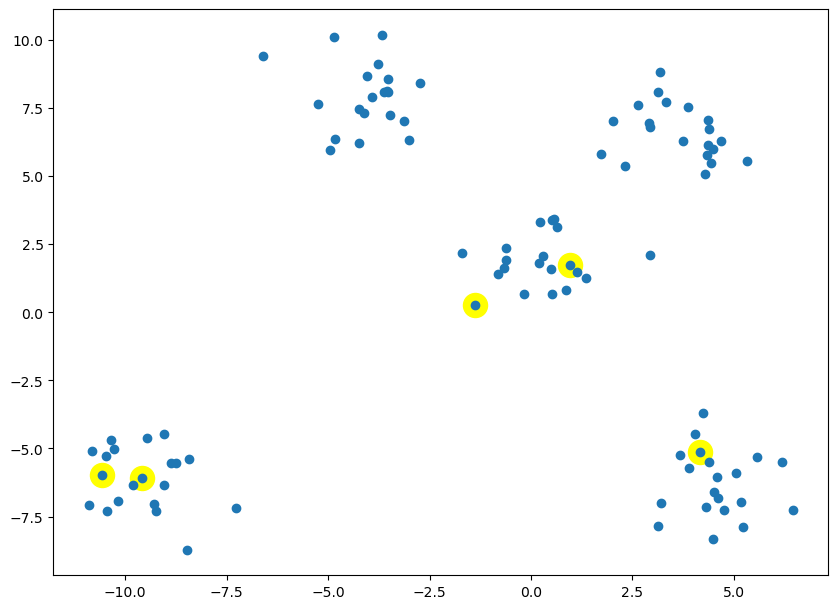

In [536]:
#Plot the initially selected centroids
plt.scatter(centroids[:,0],centroids[:,1],s=300,c='yellow')
plt.scatter(X[:,0],X[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()

### 5. Loop over each data point and allocate the closest centroid to it in cluster_assigned arr

In [537]:
def calc_distance(each_val, centroids):
        
    #Array to store the value of distance between a given point and all of the centroids
    dist_arr = []

    #Loop over each centroid in centroids_init
    for each_centroid in centroids:

        # finding sum of squares
        sum_sq = np.sum(np.square(each_val - each_centroid))

        # Doing squareroot and
        # printing Euclidean distance
        euclid_distance = np.sqrt(sum_sq)
        dist_arr.append(euclid_distance)

    return dist_arr

In [538]:
def map_cluster(X, centroids):

    #Initialize cluster_assigned to store the value of the cluster assigned to a given val
    cluster_assigned = []

    #Loop over each value and find the centroid closest to it
    #use index_map to store the value of closest centroid for each input data val
    for each_val in X:
        #Find the index of closest centroid to each_val
        #The numpy.argmin() method returns indices of the min element of the array in a particular axis. 
        closest_centroid_index = np.argmin(calc_distance(each_val, centroids))
        #Create an array that contains the number of the cluster alloted to the given val
        cluster_assigned.append(closest_centroid_index)   
    
    #returns an array that gives the cluster assigned to each_val
    return cluster_assigned
    

In [539]:
#An array with the details of the cluster assigned for a given index value in X
cluster_assigned = map_cluster(X, centroids)

## 6. Re-calculate clusters

In [540]:
X = np.array(X)
cluster_assigned = np.array(cluster_assigned)

In [541]:
def recalculate_clusters(X, cluster_assigned, K, centroids):
    for each_cluster in range(K):
        centroids[each_cluster] = np.mean(X[cluster_assigned == each_cluster], axis=0)
        
    return centroids

In [542]:
centroids = recalculate_clusters(X, cluster_assigned, K, centroids)

In [543]:
# np.mean(X[cluster_assigned == 0], axis=0)

## 7. Iterate 30 times and find the final clusters

In [544]:
#X - dataset
#K - number of clusters
#centroids - selected center points
#cluster_assigned - 
max_iter = 1000

#Convert both X and index_map to np.array
# X = np.array(X)
# cluster_assigned = np.array(cluster_assigned)
# print("This is cluster_assigned inside before iteration: ", cluster_assigned)

#Loop over and update clusters
for each_iter in range(max_iter):
    cluster_assigned = map_cluster(X, centroids)
    cluster_assigned = np.array(cluster_assigned)
    centroids = recalculate_clusters(X, cluster_assigned, K, centroids)
    

In [545]:
centroids

array([[  4.58002297,  -6.28061932],
       [ -8.67107836,  -6.63082908],
       [-10.16024855,  -5.7405348 ],
       [ -4.05050671,   7.90104677],
       [  1.92950393,   4.22326593]])

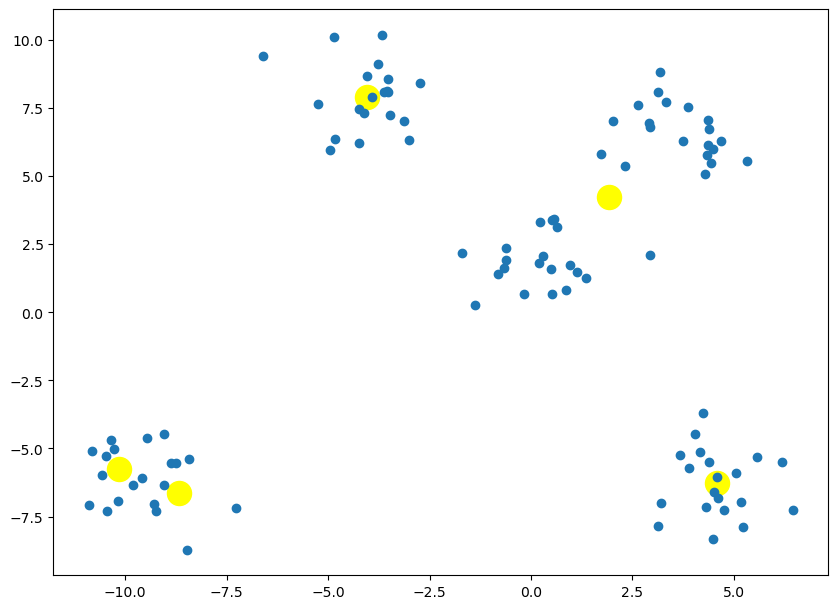

In [546]:
# for k in range(K):
#     plt.scatter(final[k+1][:,0],final[k+1][:,1])
plt.scatter(centroids[:,0],centroids[:,1],s=300,c='yellow')
plt.scatter(X[:,0],X[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()

## Using sklearn

In [547]:
from sklearn.cluster import KMeans
kmeans =  KMeans(5).fit(X)
k_colors = kmeans.cluster_centers_[kmeans.predict(X)]

In [548]:
k_colors

array([[-4.05050671,  7.90104677],
       [-9.56458048, -6.09665251],
       [ 4.58002297, -6.28061932],
       [-4.05050671,  7.90104677],
       [ 0.23713963,  1.85541645],
       [ 0.23713963,  1.85541645],
       [ 3.62186823,  6.59111541],
       [ 4.58002297, -6.28061932],
       [-9.56458048, -6.09665251],
       [-9.56458048, -6.09665251],
       [ 0.23713963,  1.85541645],
       [-9.56458048, -6.09665251],
       [-9.56458048, -6.09665251],
       [ 0.23713963,  1.85541645],
       [ 0.23713963,  1.85541645],
       [ 0.23713963,  1.85541645],
       [ 3.62186823,  6.59111541],
       [ 0.23713963,  1.85541645],
       [ 4.58002297, -6.28061932],
       [ 0.23713963,  1.85541645],
       [ 4.58002297, -6.28061932],
       [-4.05050671,  7.90104677],
       [ 4.58002297, -6.28061932],
       [ 0.23713963,  1.85541645],
       [ 0.23713963,  1.85541645],
       [-4.05050671,  7.90104677],
       [-9.56458048, -6.09665251],
       [-4.05050671,  7.90104677],
       [ 4.58002297,

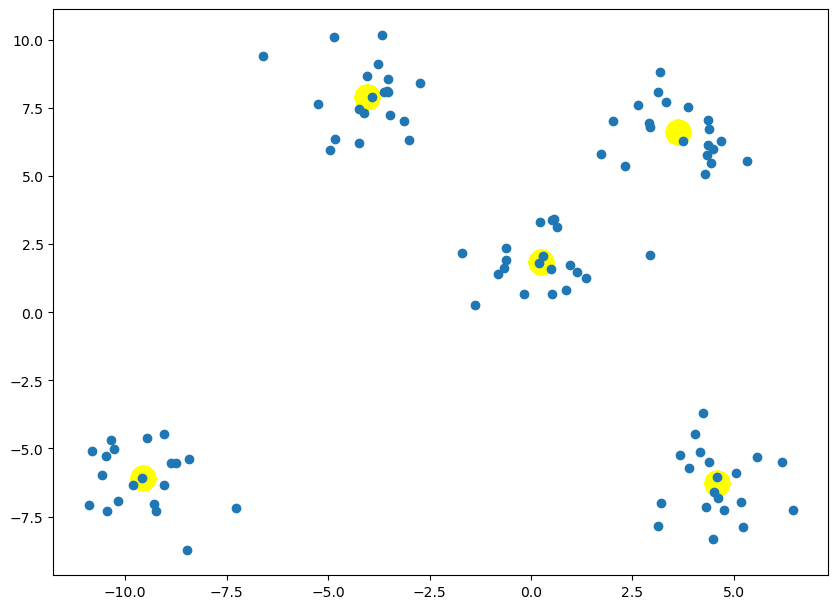

In [549]:
# for k in range(K):
#     plt.scatter(final[k+1][:,0],final[k+1][:,1])
# plt.scatter(centroids[:,0],centroids[:,1],s=300,c='yellow')
plt.scatter(k_colors[:,0],k_colors[:,1], s=300,c='yellow')
plt.scatter(X[:,0],X[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()